In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('LoanData.csv')

In [8]:
df.head()

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time       Married          No            No       Other   
2     Unemployed      Divorced         Yes           Yes        Auto   
3      Full-time       Married          No            No    Business   
4     Unemployed      Divorced          No           Yes        Auto   

  HasCoSigner  Default  
0         Yes        0  
1         Yes        0  
2          No        1  
3          No        0  
4          No        0

In [9]:
df.tail()

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
294  UN4QK8ABJE   19   92790       52133          815              14   
295  FOMH6E9WNI   18   94495      194108          626              31   
296  1ARY4VJOSS   65   60298       97181          399              20   
297  YC80M0Q6VF   29   21718      150488          816              81   
298  FTBPDPK0XW   22   17957       64185          659               3   

     NumCreditLines  InterestRate  LoanTerm  DTIRatio   Education  \
294               3         14.88        24      0.11         PhD   
295               1         18.03        36      0.21    Master's   
296               1          4.21        24      0.32         PhD   
297               2          7.83        12      0.21  Bachelor's   
298               3         24.28        60      0.30         PhD   

    EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
294  Self-employed       Married          No            No   Education   
295  Self-employed       Married         Yes            No   Education   
296      Part-time        Single          No            No    Business   
297      Full-time      Divorced          No           Yes        Home   
298     Unemployed        Single          No            No        Auto   

    HasCoSigner  Default  
294         Yes        0  
295         Yes        0  
296         Yes        0  
297         Yes        0  
298         Yes        0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          299 non-null    object 
 1   Age             299 non-null    int64  
 2   Income          299 non-null    int64  
 3   LoanAmount      299 non-null    int64  
 4   CreditScore     299 non-null    int64  
 5   MonthsEmployed  299 non-null    int64  
 6   NumCreditLines  299 non-null    int64  
 7   InterestRate    299 non-null    float64
 8   LoanTerm        299 non-null    int64  
 9   DTIRatio        299 non-null    float64
 10  Education       299 non-null    object 
 11  EmploymentType  299 non-null    object 
 12  MaritalStatus   299 non-null    object 
 13  HasMortgage     299 non-null    object 
 14  HasDependents   299 non-null    object 
 15  LoanPurpose     299 non-null    object 
 16  HasCoSigner     299 non-null    object 
 17  Default         299 non-null    int

In [11]:
df.describe()

Age         Income     LoanAmount  CreditScore  MonthsEmployed  \
count  299.000000     299.000000     299.000000   299.000000      299.000000   
mean    43.284281   81177.752508  133648.050167   565.668896       58.735786   
std     15.339867   40490.151432   67266.295301   157.128236       34.477409   
min     18.000000   15192.000000    5769.000000   303.000000        0.000000   
25%     30.000000   45318.500000   79697.000000   426.500000       31.000000   
50%     43.000000   83406.000000  136444.000000   566.000000       59.000000   
75%     56.000000  112818.000000  188985.500000   695.000000       87.500000   
max     69.000000  149401.000000  249352.000000   849.000000      119.000000   

       NumCreditLines  InterestRate    LoanTerm    DTIRatio     Default  
count      299.000000    299.000000  299.000000  299.000000  299.000000  
mean         2.471572     13.656923   36.321070    0.485987    0.103679  
std          1.124033      6.560314   16.795771    0.231843    0.305355  
min          1.000000      2.020000   12.000000    0.100000    0.000000  
25%          1.000000      8.145000   24.000000    0.285000    0.000000  
50%          2.000000     14.100000   36.000000    0.500000    0.000000  
75%          3.000000     19.165000   48.000000    0.675000    0.000000  
max          4.000000     24.610000   60.000000    0.900000    1.000000

In [12]:
df.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [13]:
df['Education'].unique()

array(["Bachelor's", "Master's", 'High School', 'PhD'], dtype=object)

In [14]:
edu = df['Education']

In [15]:
#"High School" = 1
#"Bachelor's" = 2
#"Master's" =3
#"PhD" = 4

In [16]:

def encode_education(edu):
    if edu == "High School":
        return 1
    elif edu == "Bachelor's":
        return 2
    elif edu == "Master's":
        return 3
    else:
        return 4  # For PhD or other degrees

In [17]:
df['Education'] = df['Education'].apply(encode_education)

In [18]:
df.head()

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education EmploymentType  \
0               4         15.23        36      0.44          2      Full-time   
1               1          4.81        60      0.68          3      Full-time   
2               3         21.17        24      0.31          3     Unemployed   
3               3          7.07        24      0.23          1      Full-time   
4               4          6.51        48      0.73          2     Unemployed   

  MaritalStatus HasMortgage HasDependents LoanPurpose HasCoSigner  Default  
0      Divorced         Yes           Yes       Other         Yes        0  
1       Married          No            No       Other         Yes        0  
2      Divorced         Yes           Yes        Auto          No        1  
3       Married          No            No    Business          No        0  
4      Divorced          No           Yes        Auto          No        0

In [14]:
df['EmploymentType'].unique()

array(['Full-time', 'Unemployed', 'Self-employed', 'Part-time'],
      dtype=object)

In [15]:
emp = df['EmploymentType']

In [16]:
def encode_Employement_type(emp):
    if emp == 'Unemployed':
        return 0
    elif emp == 'Part-time':
        return 1
    elif emp == 'Self-employed':
        return 2
    else:
        return 3 

In [17]:
df['EmploymentType'] =  df['EmploymentType'].apply(encode_Employement_type)

In [19]:
df.head()

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education EmploymentType  \
0               4         15.23        36      0.44          2      Full-time   
1               1          4.81        60      0.68          3      Full-time   
2               3         21.17        24      0.31          3     Unemployed   
3               3          7.07        24      0.23          1      Full-time   
4               4          6.51        48      0.73          2     Unemployed   

  MaritalStatus HasMortgage HasDependents LoanPurpose HasCoSigner  Default  
0      Divorced         Yes           Yes       Other         Yes        0  
1       Married          No            No       Other         Yes        0  
2      Divorced         Yes           Yes        Auto          No        1  
3       Married          No            No    Business          No        0  
4      Divorced          No           Yes        Auto          No        0

In [20]:
df['MaritalStatus'].unique()

array(['Divorced', 'Married', 'Single'], dtype=object)

In [21]:
mer = df['MaritalStatus']

In [22]:
def encode_MaritalStatus(mer):
    if mer == 'Single':
        return 0
    elif mer == 'Married':
        return 1
    else:
        return 2

In [23]:
df['MaritalStatus'] = df['MaritalStatus'].apply(encode_MaritalStatus)

In [24]:
df.head()

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education EmploymentType  \
0               4         15.23        36      0.44          2      Full-time   
1               1          4.81        60      0.68          3      Full-time   
2               3         21.17        24      0.31          3     Unemployed   
3               3          7.07        24      0.23          1      Full-time   
4               4          6.51        48      0.73          2     Unemployed   

   MaritalStatus HasMortgage HasDependents LoanPurpose HasCoSigner  Default  
0              2         Yes           Yes       Other         Yes        0  
1              1          No            No       Other         Yes        0  
2              2         Yes           Yes        Auto          No        1  
3              1          No            No    Business          No        0  
4              2          No           Yes        Auto          No        0

In [24]:
has = df['HasMortgage']

In [25]:
df['HasMortgage'].unique()

array(['Yes', 'No'], dtype=object)

In [26]:
def encode_HasMortgage(has):
    if has == 'Yes':
        return 1
    else:
        return 0

In [27]:
df['HasMortgage'] = df['HasMortgage'].apply(encode_HasMortgage)

In [28]:
df.head()

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
0               4         15.23        36      0.44          2   
1               1          4.81        60      0.68          3   
2               3         21.17        24      0.31          3   
3               3          7.07        24      0.23          1   
4               4          6.51        48      0.73          2   

   EmploymentType  MaritalStatus  HasMortgage HasDependents LoanPurpose  \
0               3              2            1           Yes       Other   
1               3              1            0            No       Other   
2               0              2            1           Yes        Auto   
3               3              1            0            No    Business   
4               0              2            0           Yes        Auto   

  HasCoSigner  Default  
0         Yes        0  
1         Yes        0  
2          No        1  
3          No        0  
4          No        0

In [29]:
df.drop(columns = ['HasDependents'],inplace=True)

In [30]:
df.drop(columns = ['HasCoSigner'],inplace=True)


In [31]:
df.drop(columns = ['LoanID'],inplace=True)

In [25]:
df.drop(columns= ['LoanPurpose'],inplace=True)

In [32]:
df.head()

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   
4   60   20437        9139          633               8               4   

   InterestRate  LoanTerm  DTIRatio  Education  EmploymentType  MaritalStatus  \
0         15.23        36      0.44          2               3              2   
1          4.81        60      0.68          3               3              1   
2         21.17        24      0.31          3               0              2   
3          7.07        24      0.23          1               3              1   
4          6.51        48      0.73          2               0              2   

   HasMortgage LoanPurpose  Default  
0            1       Other        0  
1            0       Other        0  
2            1        Auto        1  
3            0    Business        0  
4            0        Auto        0

In [33]:
df['LoanPurpose'].unique()

array(['Other', 'Auto', 'Business', 'Home', 'Education'], dtype=object)

In [34]:
purpose = df['LoanPurpose']

In [35]:
def Loan_enc(purpose):
    if purpose == 'Education':
        return 0
    elif purpose == 'Home':
        return 1
    elif purpose == 'Business':
        return 2
    elif purpose == 'Auto':
        return 3
    else :
        return 4


In [36]:
df['LoanPurpose'] = df['LoanPurpose'].apply(Loan_enc)

In [37]:
df.head()

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   
4   60   20437        9139          633               8               4   

   InterestRate  LoanTerm  DTIRatio  Education  EmploymentType  MaritalStatus  \
0         15.23        36      0.44          2               3              2   
1          4.81        60      0.68          3               3              1   
2         21.17        24      0.31          3               0              2   
3          7.07        24      0.23          1               3              1   
4          6.51        48      0.73          2               0              2   

   HasMortgage  LoanPurpose  Default  
0            1            4        0  
1            0            4        0  
2            1            3        1  
3            0            2        0  
4            0            3        0

In [26]:
X = df.drop(columns= ['Default'])

In [27]:
y = df ['Default']

In [40]:
X.shape

(255347, 14)

In [41]:
y.shape

(255347,)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
xcolumns = X.columns

In [45]:
X = scaler.fit_transform(X)

In [46]:
X = pd.DataFrame(X, columns = xcolumns)

In [47]:
X.head()

Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
0  0.833990  0.089693   -1.086833    -0.341492        0.590533   
1  1.701221 -0.823021   -0.044309    -0.731666       -1.285731   
2  0.166888  0.043854    0.022715    -0.775718       -0.968209   
3 -0.767053 -1.303452   -1.168538     1.061875       -1.718715   
4  1.100830 -1.592855   -1.671921     0.369631       -1.487790   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
0        1.341937      0.261771 -0.001526 -0.260753  -0.444173   
1       -1.343791     -1.308350  1.412793  0.778585   0.450914   
2        0.446694      1.156831 -0.708685 -0.823728   0.450914   
3        0.446694     -0.967805 -0.708685 -1.170174  -1.339261   
4        1.341937     -1.052188  0.705634  0.995114  -0.444173   

   EmploymentType  MaritalStatus  HasMortgage  LoanPurpose  
0        1.344137       1.225315     0.999973     1.417176  
1        1.344137      -0.000101    -1.000027     1.417176  
2       -1.340776       1.225315     0.999973     0.709453  
3        1.344137      -0.000101    -1.000027     0.001729  
4       -1.340776       1.225315    -1.000027     0.709453

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

[]

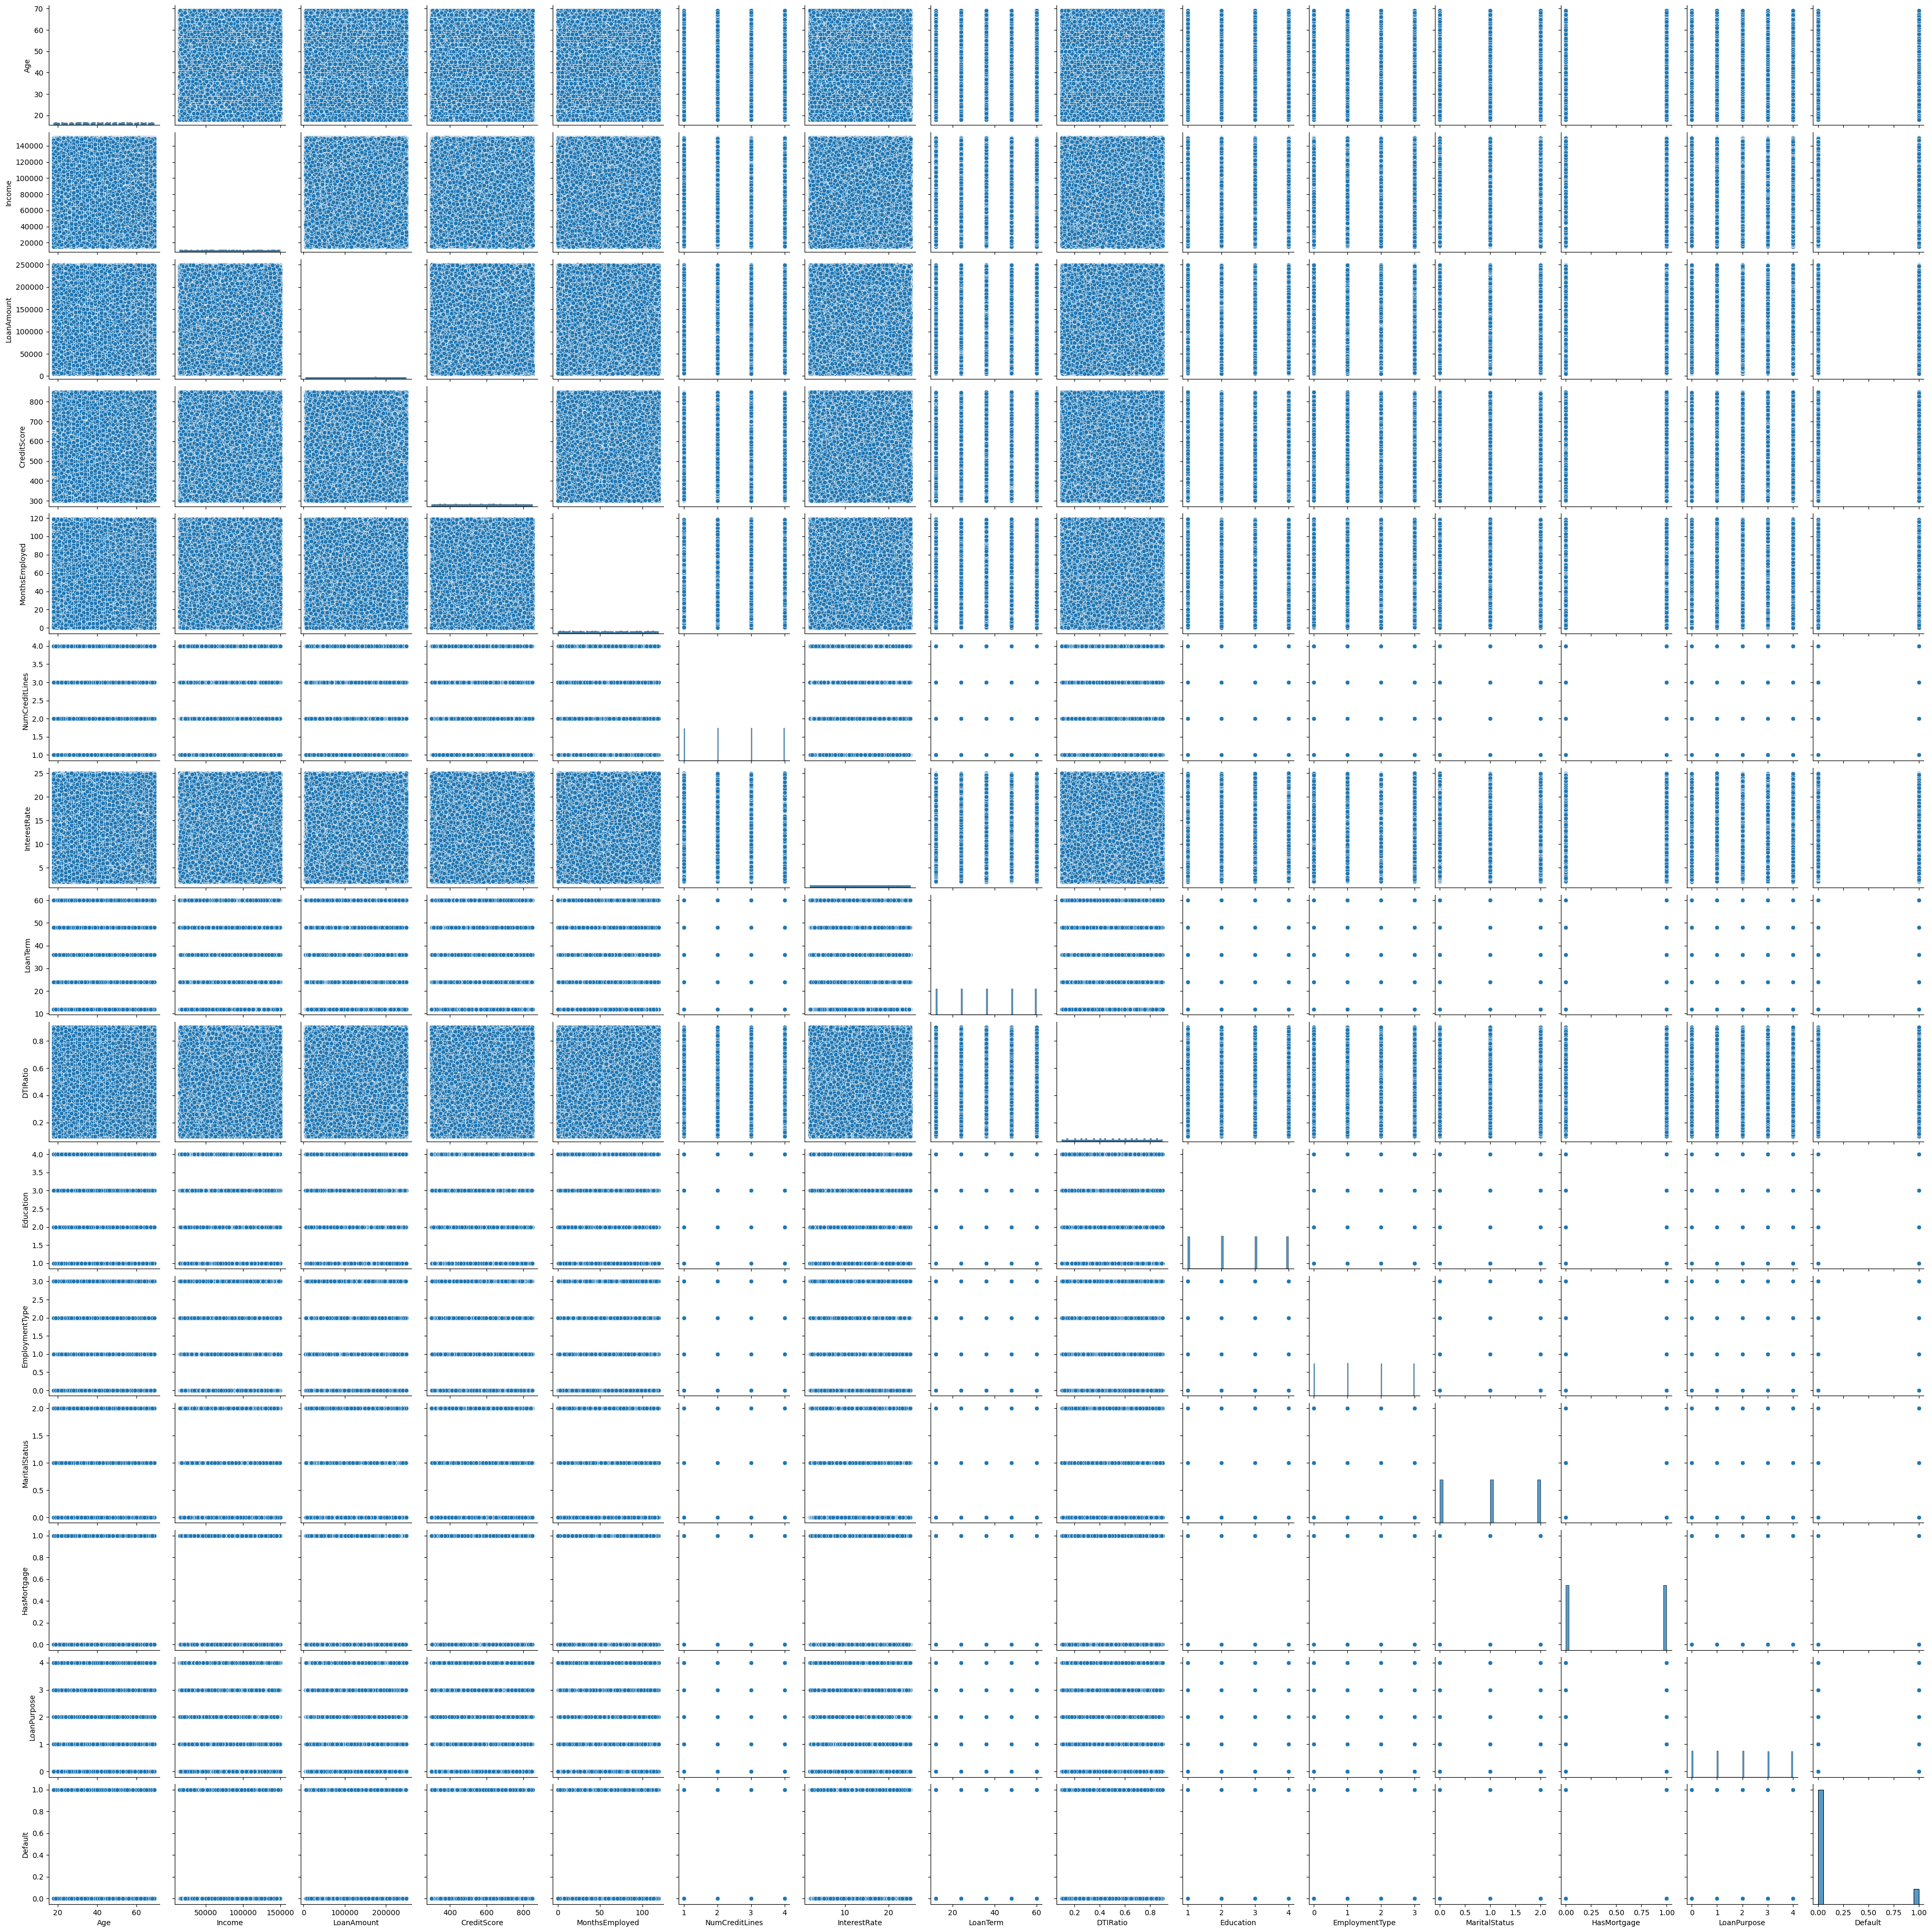

In [48]:
sns.pairplot(df)
plt.plot()

[]

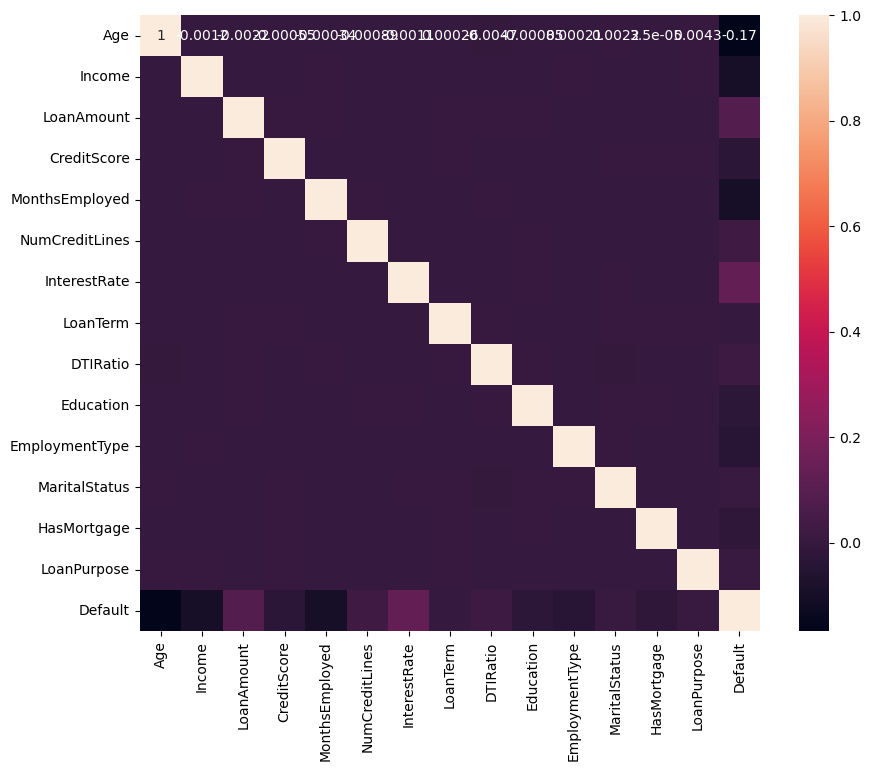

In [49]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True)
plt.plot()

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state= 100)

In [52]:
X_train.shape

(178742, 14)

In [53]:
X_test.shape

(76605, 14)

### Logical Regression Model

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
model = LogisticRegression()

In [95]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [96]:
model.score(X_train,y_train)

0.8853207416275973

In [97]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
from sklearn import metrics

In [99]:
metrics.accuracy_score(y_test,y_pred)

0.883728216173879

In [100]:
metrics.confusion_matrix(y_test,y_pred)

array([[67431,   217],
       [ 8690,   267]], dtype=int64)

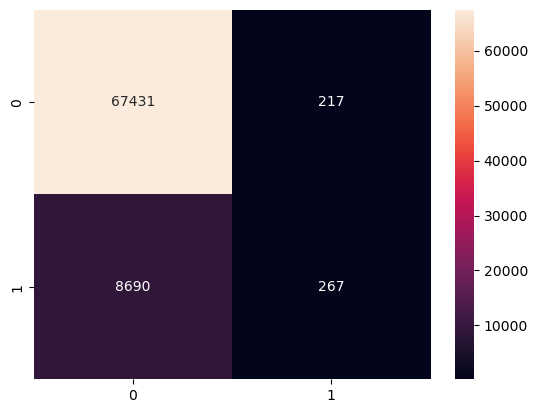

In [101]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')
plt.show()

### Print the classification report

In [102]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67648
           1       0.55      0.03      0.06      8957

    accuracy                           0.88     76605
   macro avg       0.72      0.51      0.50     76605
weighted avg       0.85      0.88      0.83     76605



## Create a SVM model and train it

In [54]:
from sklearn.svm import SVC

In [55]:
model = SVC()

In [ ]:
#Train the model
model.fit(X_train, y_train)

In [ ]:
model.score(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred